# Feature Engineering & Selection - Titanic Dataset

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler, MinMaxScaler
from sklearn.feature_selection import SelectKBest, chi2, f_classif, VarianceThreshold, RFE
from sklearn.linear_model import LogisticRegression, Lasso
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA

# Load the Titanic dataset
file_path = "Titanic-Dataset.csv"
df = pd.read_csv(file_path)

# Display first 5 rows
df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Handling Missing Values

In [3]:
# Check missing values
print(df.isnull().sum())

# Fill missing numerical values with median
num_imputer = SimpleImputer(strategy='median')
df[['Age', 'Fare']] = num_imputer.fit_transform(df[['Age', 'Fare']])

# Fill missing categorical values with most frequent value
cat_imputer = SimpleImputer(strategy='most_frequent')
df[['Embarked']] = cat_imputer.fit_transform(df[['Embarked']])

# Drop Cabin column due to too many missing values
df.drop(columns=['Cabin'], inplace=True)

# Verify missing values are handled
print(df.isnull().sum())


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64


## Encoding Categorical Features

In [4]:
# Label Encoding for binary categorical feature
label_encoder = LabelEncoder()
df['Sex'] = label_encoder.fit_transform(df['Sex'])

# One-Hot Encoding for multi-category features
df = pd.get_dummies(df, columns=['Embarked'], drop_first=True)

# Drop unnecessary columns
df.drop(columns=['Name', 'Ticket'], inplace=True)

# Display transformed dataset
df.head()


,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S
0,1,0,3,1,22.0,1,0,7.2500,False,True
1,2,1,1,0,38.0,1,0,71.2833,False,False
2,3,1,3,0,26.0,0,0,7.9250,False,True
3,4,1,1,0,35.0,1,0,53.1000,False,True
4,5,0,3,1,35.0,0,0,8.0500,False,True


## Feature Scaling & Normalization

In [5]:
# Standardization
scaler = StandardScaler()
df_scaled = df.copy()
df_scaled[['Age', 'Fare']] = scaler.fit_transform(df_scaled[['Age', 'Fare']])

# Display transformed dataset
df_scaled.head()


,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S
0,1,0,3,1,-0.565736,1,0,-0.502445,False,True
1,2,1,1,0,0.663861,1,0,0.786845,False,False
2,3,1,3,0,-0.258337,0,0,-0.488854,False,True
3,4,1,1,0,0.433312,1,0,0.420730,False,True
4,5,0,3,1,0.433312,0,0,-0.486337,False,True


## Feature Selection using Variance Threshold

In [6]:
# Variance Threshold to remove low variance features
selector = VarianceThreshold(threshold=0.01)
df_selected = df_scaled.copy()
df_selected = pd.DataFrame(selector.fit_transform(df_selected), columns=df_scaled.columns[selector.get_support()])

# Display selected features
df_selected.head()


,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S
0,1.0,0.0,3.0,1.0,-0.565736,1.0,0.0,-0.502445,0.0,1.0
1,2.0,1.0,1.0,0.0,0.663861,1.0,0.0,0.786845,0.0,0.0
2,3.0,1.0,3.0,0.0,-0.258337,0.0,0.0,-0.488854,0.0,1.0
3,4.0,1.0,1.0,0.0,0.433312,1.0,0.0,0.420730,0.0,1.0
4,5.0,0.0,3.0,1.0,0.433312,0.0,0.0,-0.486337,0.0,1.0


## Feature Selection using Chi-Square Test

In [9]:
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.preprocessing import MinMaxScaler

# Load dataset
dfc = df_scaled.copy()  # Ensure you're using a clean version of the dataset

# Define X and y
X = dfc.drop(columns=['Survived'])  # Features
y = dfc['Survived']  # Target variable

# Apply MinMaxScaler to ensure non-negative values
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Apply Chi-Square test
chi_selector = SelectKBest(score_func=chi2, k=5)
X_new = chi_selector.fit_transform(X_scaled, y)

# Get selected feature names
selected_features = X.columns[chi_selector.get_support()]
print("Selected Features:", selected_features)


Selected Features: Index(['Pclass', 'Sex', 'Parch', 'Fare', 'Embarked_S'], dtype='object')


## Feature Selection using RFE

In [10]:
# Recursive Feature Elimination (RFE) with Logistic Regression
model = LogisticRegression(max_iter=2000)
rfe = RFE(model, n_features_to_select=5)
rfe.fit(X, y)

# Get selected feature names
selected_features_rfe = X.columns[rfe.support_]
print("Selected Features:", selected_features_rfe)


Selected Features: Index(['Pclass', 'Sex', 'Age', 'SibSp', 'Embarked_S'], dtype='object')


## Feature Selection using Lasso Regression

In [11]:
# Lasso Regression for feature selection
lasso = Lasso(alpha=0.01)
lasso.fit(X, y)

# Get selected feature names
selected_features_lasso = X.columns[lasso.coef_ != 0]
print("Selected Features:", selected_features_lasso)


Selected Features: Index(['PassengerId', 'Pclass', 'Sex', 'Age', 'SibSp', 'Fare', 'Embarked_S'], dtype='object')


## Feature Selection using Random Forest Importance

C:\Users\Ch.K.Abhiram\AppData\Local\Temp\ipykernel_21272\975364338.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_importances, palette="viridis")


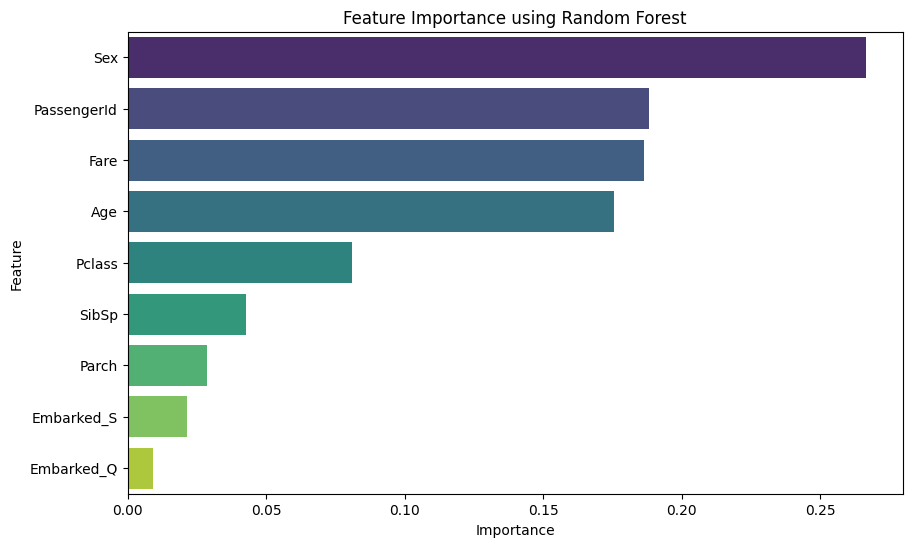

In [12]:
# Feature Importance using Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X, y)

# Get feature importance
feature_importances = pd.DataFrame({'Feature': X.columns, 'Importance': rf.feature_importances_})
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importances, palette="viridis")
plt.title("Feature Importance using Random Forest")
plt.show()


## Dimensionality Reduction using PCA

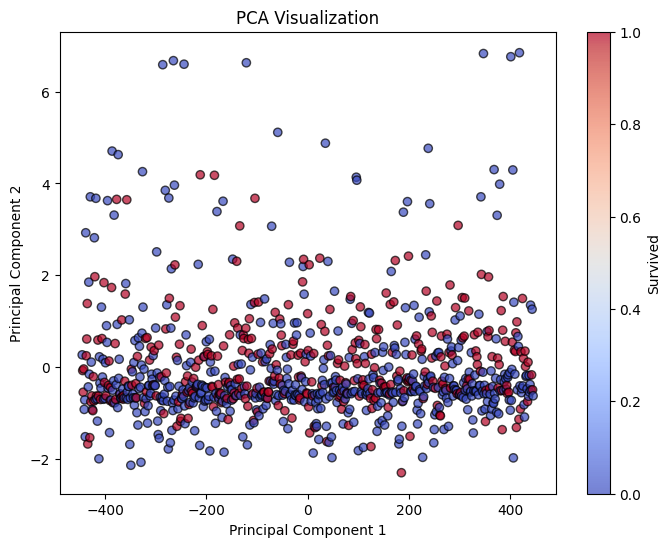

In [13]:
# PCA for dimensionality reduction
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Scatter plot for PCA components
plt.figure(figsize=(8,6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='coolwarm', edgecolors='k', alpha=0.7)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("PCA Visualization")
plt.colorbar(label="Survived")
plt.show()
